<a href="https://colab.research.google.com/github/jubair231dd/ML/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(111)

In [ ]:
# train_data_length = 1024
# train_data = torch.zeros((train_data_length, 2))
# train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
# train_data[:, 1] = torch.sin(train_data[:, 0])
# train_labels = torch.zeros(train_data_length)
# train_set = [
#     (train_data[i], train_labels[i]) for i in range(train_data_length)
# ]

In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
print(train_data[:5])
theta = 2 * math.pi * torch.rand(train_data_length)
print(theta[:5])
train_data[:, 0] = torch.cos(theta)
train_data[:, 1] = torch.sin(theta)
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)
]


tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([0.3626, 2.3970, 6.1773, 6.0489, 0.8552])


In [ ]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 3))  # Increase dimension from 2 to 3
print(train_data[:5])
theta = 2 * math.pi * torch.rand(train_data_length)
print(theta[:5])
phi = torch.acos(2 * torch.rand(train_data_length) - 1)  # Generate random angles for the third dimension
print(phi[:5])
train_data[:, 0] = torch.sin(phi) * torch.cos(theta)  # Calculate x-coordinate
train_data[:, 1] = torch.sin(phi) * torch.sin(theta)  # Calculate y-coordinate
train_data[:, 2] = torch.cos(phi)  # Calculate z-coordinate
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([3.5167, 0.6534, 6.0266, 0.4166, 4.1332])
tensor([2.0856, 0.5760, 1.6495, 2.5488, 1.2926])


<ipython-input-22-399c06cd92b7>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, s=1, cmap='viridis')


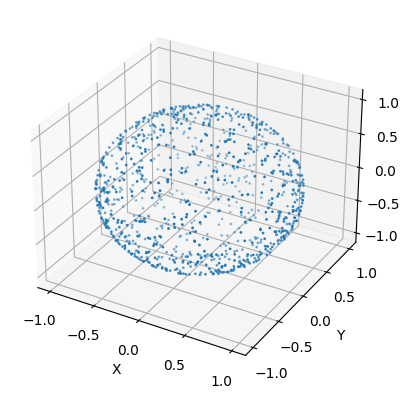

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = train_data[:, 0]
y = train_data[:, 1]
z = train_data[:, 2]

ax.scatter(x, y, z, s=1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


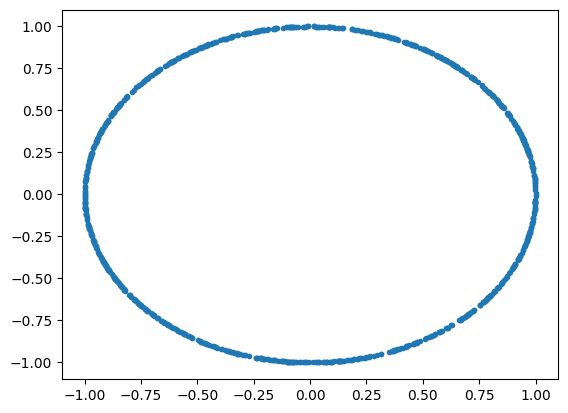

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [ ]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [ ]:
# See first training sample
image, label = train_set[0]
image, label
print(image.shape)
print(image)

torch.Size([3])
tensor([-0.8099, -0.3189, -0.4924])


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [ ]:
discriminator = Discriminator()

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 3),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [ ]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [ ]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 3))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 3))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2908461093902588
Epoch: 0 Loss G.: 1.424659013748169
Epoch: 10 Loss D.: 0.656825840473175
Epoch: 10 Loss G.: 0.7895129323005676
Epoch: 20 Loss D.: 0.5969581007957458
Epoch: 20 Loss G.: 1.3021063804626465
Epoch: 30 Loss D.: 0.6751704216003418
Epoch: 30 Loss G.: 0.7433605194091797
Epoch: 40 Loss D.: 0.737994909286499
Epoch: 40 Loss G.: 0.8041453957557678
Epoch: 50 Loss D.: 0.5891070365905762
Epoch: 50 Loss G.: 1.1547778844833374
Epoch: 60 Loss D.: 0.6168031096458435
Epoch: 60 Loss G.: 1.2288264036178589
Epoch: 70 Loss D.: 0.6474536061286926
Epoch: 70 Loss G.: 0.8168898224830627
Epoch: 80 Loss D.: 0.705088198184967
Epoch: 80 Loss G.: 0.7728817462921143
Epoch: 90 Loss D.: 0.7128477096557617
Epoch: 90 Loss G.: 0.775401771068573
Epoch: 100 Loss D.: 0.5945999026298523
Epoch: 100 Loss G.: 1.082682728767395
Epoch: 110 Loss D.: 0.7149156332015991
Epoch: 110 Loss G.: 0.6450366377830505
Epoch: 120 Loss D.: 0.7106066942214966
Epoch: 120 Loss G.: 0.7237650752067566
Epoch: 130 Los

In [ ]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

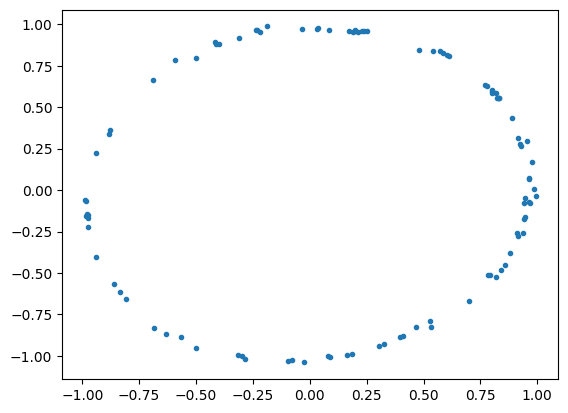

In [ ]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

<ipython-input-37-4bda236e174e>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, s=1, cmap='viridis')


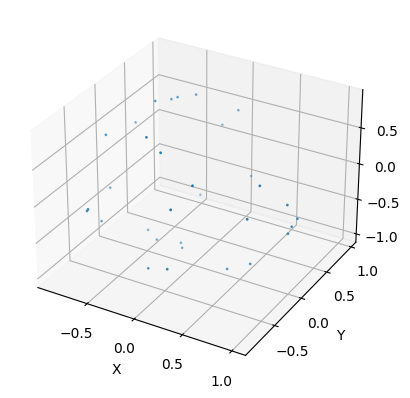

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
generated_samples = generated_samples.detach()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = generated_samples[:, 0]
y = generated_samples[:, 1]
z = generated_samples[:, 2]

ax.scatter(x, y, z, s=1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
